# 6.4. Machine Learning for Regression Analysis

Contents

    1. Import Libraries
    2. Import Dataframes
    3. Finding Variables to Test
    4. Test Hypothesis
    5. Prep for Regression Analysis
    6. Regression Analysis
    7. Interpretation
    8. Final Comments

# 01. Import Libraries

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
%matplotlib inline

# 02. Import Dataframes

In [4]:
# create path to folder
path = r"C:\Users\mngun\OneDrive\Desktop\Data Analysis\Data Immersion\Achievement 6\Life Expectancy"
# import file
df_life = pd.read_pickle(os.path.join(path, '02_Data','Prepared Data','df_life_corr.pkl'))

In [5]:
df_life.shape

(1904, 18)

In [6]:
df_life.head()

Country  Year Continent  Least Developed  life_expect  Population  \
0  Albania  2000    Europe            False       73.955     3089027   
1  Albania  2001    Europe            False       74.288     3060173   
2  Albania  2002    Europe            False       74.579     3051010   
3  Albania  2003    Europe            False       74.828     3039616   
4  Albania  2004    Europe            False       75.039     3026939   

   CO2_emiss  health_spend  Electric_consumption  forest_area  gdp_per_capita  \
0   1.026213      7.233370           1414.703784    28.076642     3860.804627   
1   1.055496      7.139524           1449.647413    28.123248     4299.546493   
2   1.232379      6.909341           1351.230796    28.169854     4661.402695   
3   1.338985      7.063490           1578.165919    28.216460     5000.049363   
4   1.404059      6.773372           1469.264539    28.263066     5427.732662   

   internet_usage  military_spend  open_defecation  drinking_water_services  \
0        0.114097        1.246360         0.888853                86.754471   
1        0.325798        1.309291         0.836397                86.904070   
2        0.390081        1.320034         0.781899                87.451635   
3        0.971900        1.336843         0.728191                87.987194   
4        2.420388        1.381158         0.675281                88.510583   

   adult_obesity  beer_consumption Expected Age  
0           12.8           1.33431         High  
1           13.3           1.48995         High  
2           13.9           1.28697         High  
3           14.4           1.44830         High  
4           15.0           1.37617     Advanced

# 03. Finding Variables to Test

In [10]:
# creating a subset for columns with numeric data
df_numeric = df_life.drop(columns= ['Country','Year','Continent','Least Developed','Expected Age'])

In [11]:
# checking shape of new dataframe for numeric value columns
df_numeric.shape

(1904, 13)

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

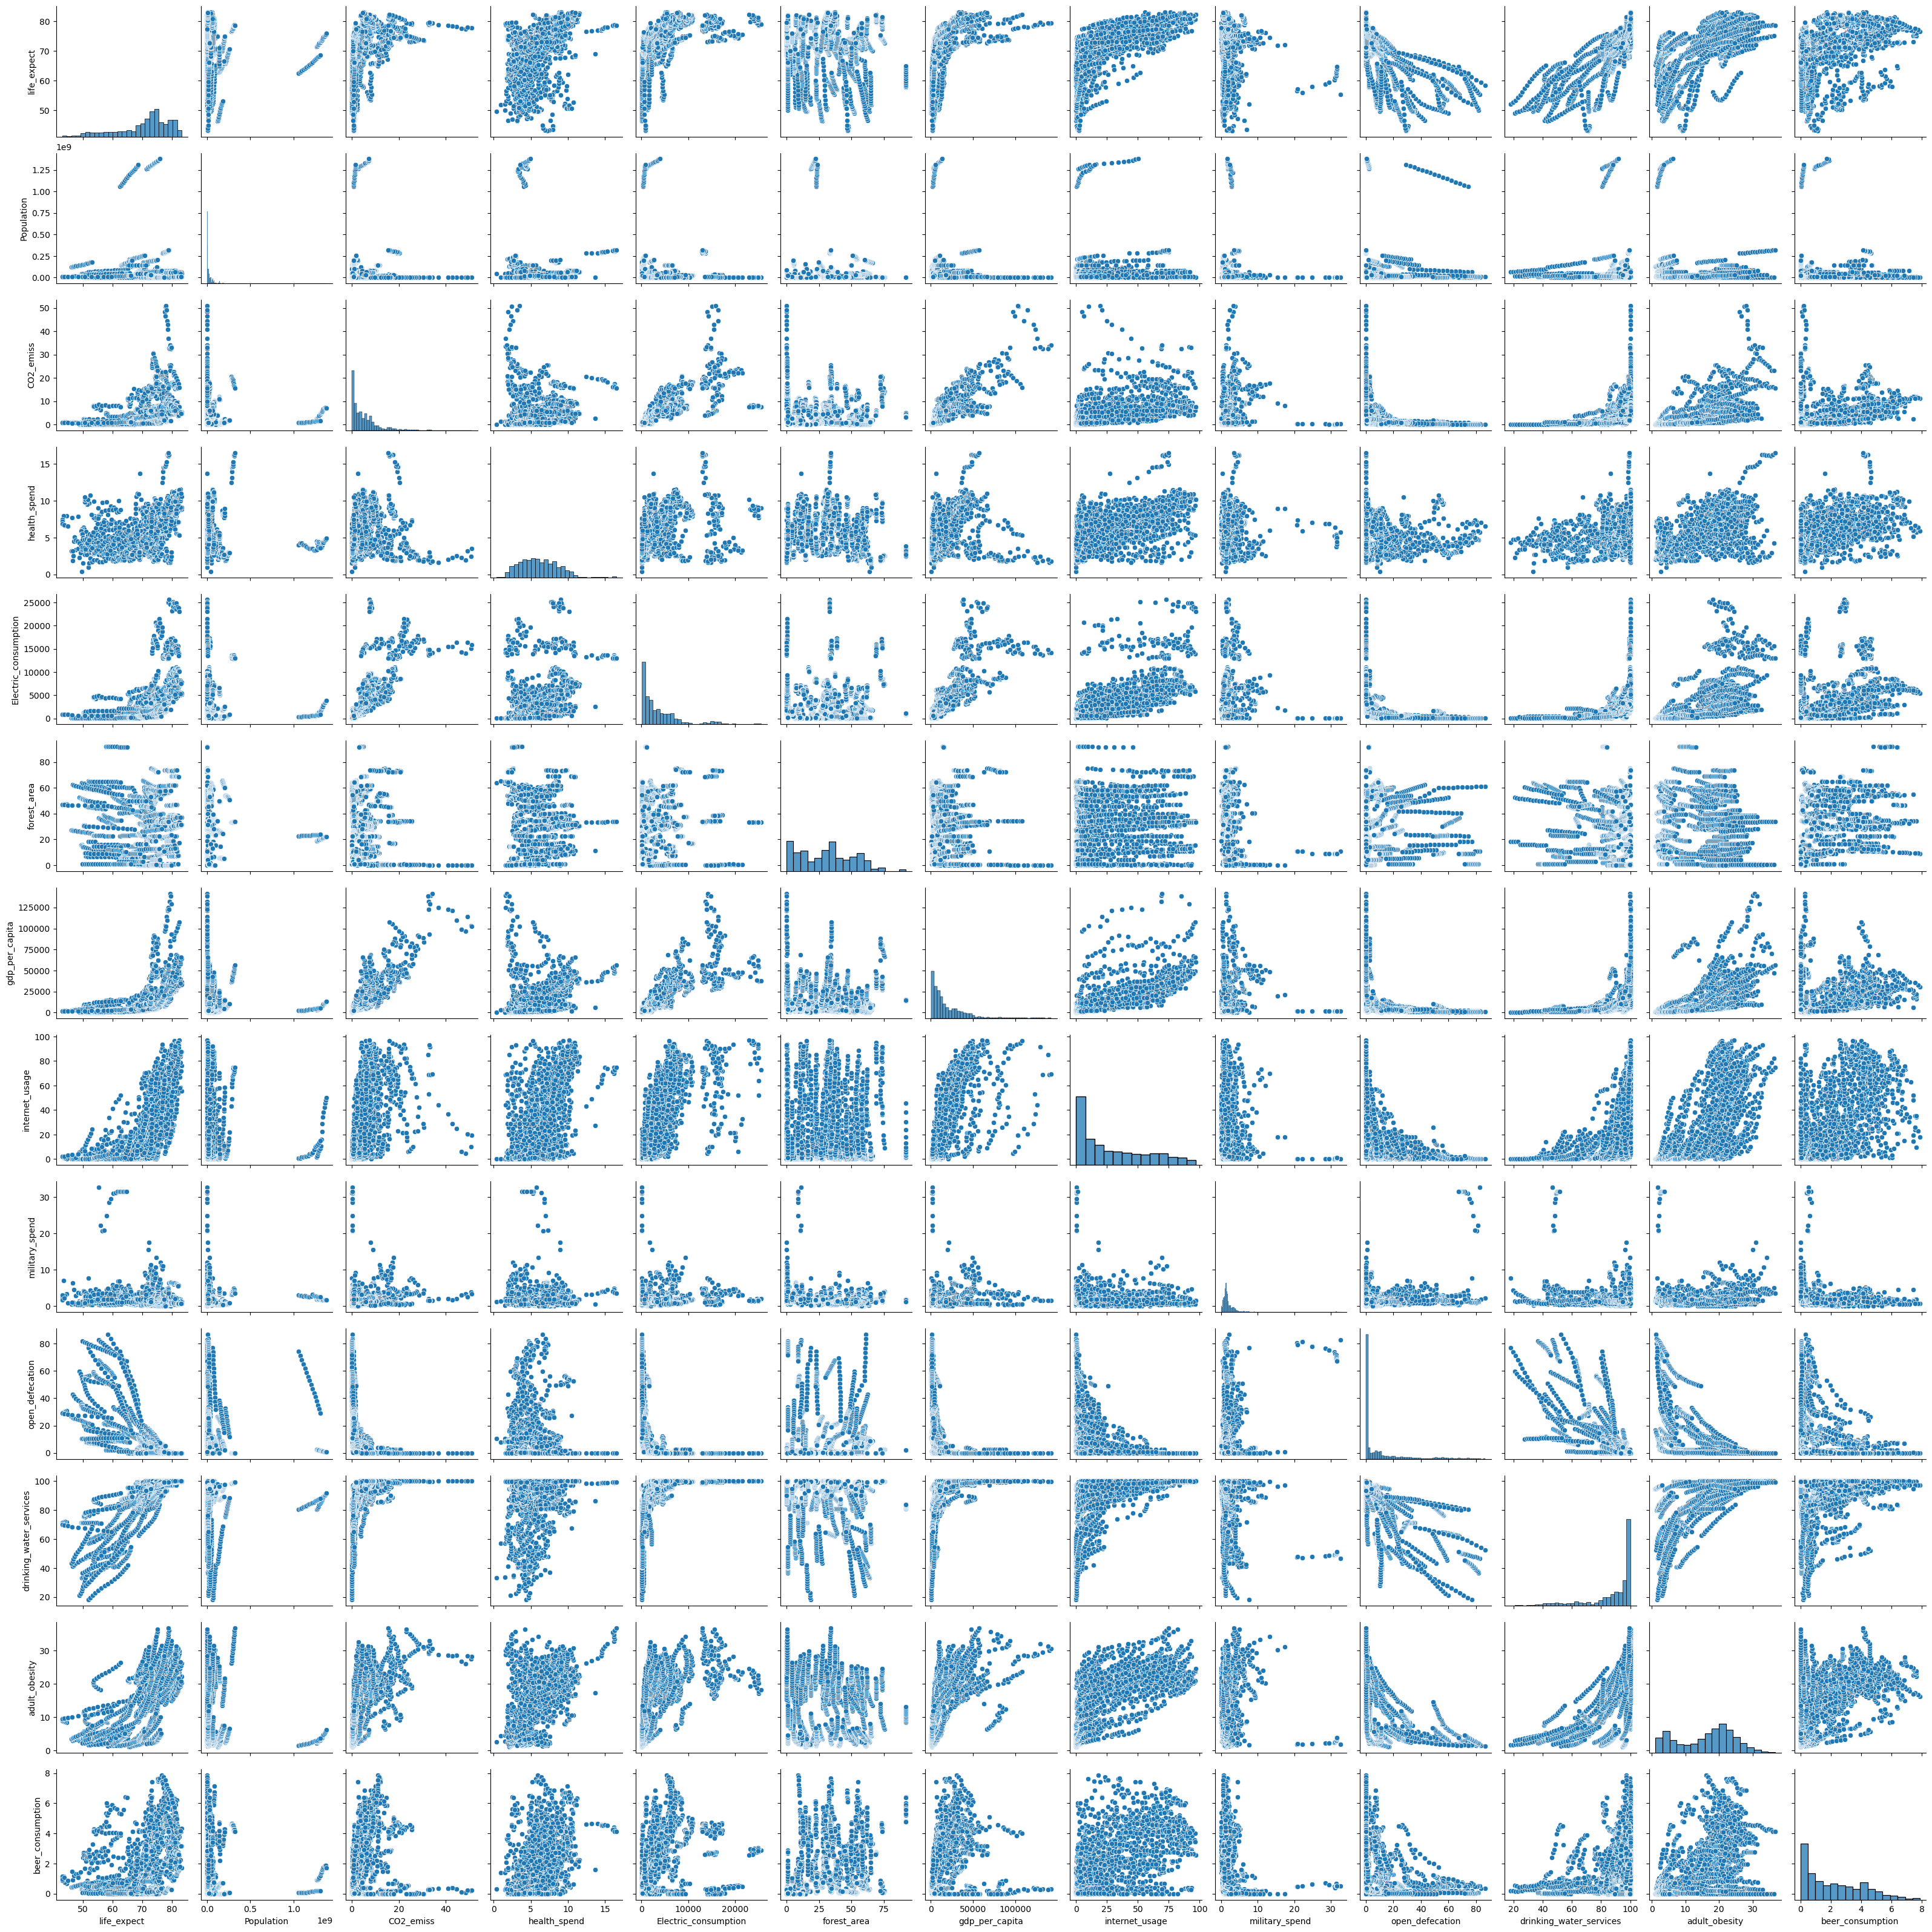

In [13]:
#create a pair plot for a quick overview
g = sns.pairplot(df_numeric)

Text(0, 0.5, 'Life Expectancy in Years')

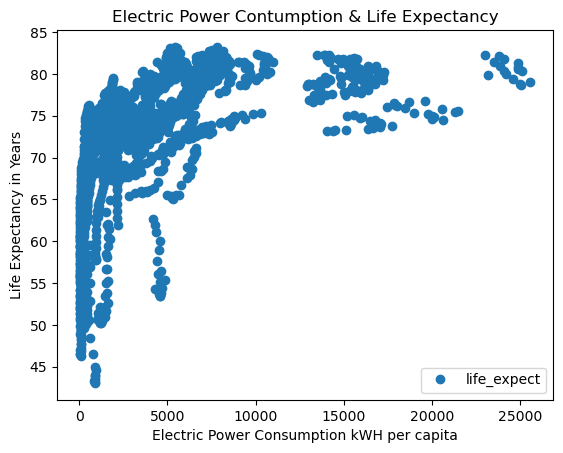

In [15]:
# showing the selected scatterplot
df_life.plot(x = 'Electric_consumption', y = 'life_expect', style= 'o')
plt.title('Electric Power Contumption & Life Expectancy')
plt.xlabel('Electric Power Consumption kWH per capita')
plt.ylabel('Life Expectancy in Years')

# 04. Hypothesis

1. Increased electric power consumption increases life expectancy

# 05. Prep for Regression Analysis

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_life['Electric_consumption'].values.reshape(-1,1)
y = df_life['life_expect'].values.reshape(-1,1)

In [21]:
X.shape

(1904, 1)

In [22]:
y.shape

(1904, 1)

In [23]:
# creating two sets -  one for training and one for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0)

# 06. Regression Analysis

In [24]:
# creating the regression object
regression = LinearRegression()

In [26]:
# fitting the training set into regression
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# trying to predict the y values
y_predict = regression.predict(X_test)

Text(0, 0.5, 'Life Expectancy')

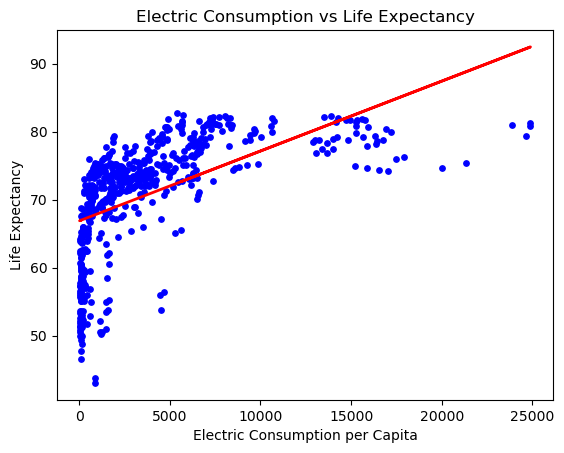

In [31]:
# create a scatterplot to chart the outcomes
test_plot = plt
test_plot.scatter(X_test, y_test, color= 'blue', s=15)
test_plot.plot(X_test, y_predict, color= 'red', linewidth= 2)
test_plot.title('Electric Consumption vs Life Expectancy')
test_plot.xlabel('Electric Consumption per Capita')
test_plot.ylabel('Life Expectancy')

# 07. Interpretation

The line is not a perfect match to the data. Especially for very low levels of electric power consumption, there is virtually zero correlation with life expectancy. This implies that at these levels, there are other factors, which contribute to the variance in life expectancy we see across countries. I would take a wild guess and consider 'open defecation' or access to 'basic drinking water services'.

After 15,000kWh per capita, we see that there are again factors which impact life expectancy, as there some countries with very high electric power consumption, where life expectancy is actually lower than in countries will lower electric power consumption. I would take a guess and consider adult_obesity or health spending.

In [33]:
# create objects which hold the summary statistics
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [35]:
# print the regression summary statistics
print('Mean Squared Error:',rmse)
print('R2 score:',r2)
print('Slope:',regression.coef_)

Mean Squared Error: 47.23769366179235
R2 score: 0.3282509038887663
Slope: [[0.001028]]


In [38]:
# removing limits to how many rows can be viewed - improves overview!
pd.set_option('display.max_rows', None)
# comparing actual y-values with predicted y-values
data = pd.DataFrame({'Actual': y_test.flatten(),'Predicted': y_predict.flatten()})
data

Actual  Predicted
0    80.948780  72.698628
1    81.090244  74.309016
2    72.570732  68.756917
3    80.841463  77.739757
4    79.248780  73.335965
5    74.970000  67.738321
6    76.091000  69.499263
7    74.194390  69.097862
8    65.950000  70.499757
9    80.992683  74.814376
10   62.582000  67.108416
11   74.129000  69.327621
12   65.810000  67.110701
13   71.009756  69.014034
14   72.612195  71.171192
15   59.670000  66.969702
16   65.939000  67.110898
17   71.965854  70.623984
18   72.746000  69.628717
19   75.193000  77.039409
20   82.204878  80.747008
21   73.649000  69.302752
22   67.185000  68.985615
23   81.956098  81.579122
24   74.451000  69.246903
25   67.818000  68.419717
26   64.165000  66.958806
27   75.199000  67.934479
28   79.234146  77.206883
29   75.143902  73.352622
30   74.034000  67.910732
31   82.043902  75.427888
32   73.895122  70.398056
33   73.820000  68.747010
34   67.338000  68.755768
35   75.173171  72.752915
36   52.313000  67.090511
37   74.056000  68.834362
38   80.982927  75.506827
39   71.605000  67.618322
40   69.874000  68.629501
41   74.124390  70.459157
42   75.461000  71.671594
43   71.116000  67.591803
44   78.578049  73.323533
45   61.422000  67.002233
46   75.478000  88.812380
47   76.448780  71.630875
48   76.342000  85.303547
49   64.798000  67.058300
50   57.583000  67.172278
51   73.241000  67.758650
52   72.707000  69.457675
53   72.233000  67.192448
54   51.256000  66.921041
55   74.623000  75.719377
56   71.728000  68.650981
57   65.264000  66.965889
58   71.912195  69.249227
59   75.287805  71.280740
60   71.466000  69.739147
61   80.795122  92.451837
62   73.638000  67.953703
63   75.089000  68.025266
64   78.195122  73.905233
65   68.567000  67.776652
66   78.506000  70.917321
67   75.423000  68.659670
68   62.186000  66.942308
69   74.696000  67.687057
70   72.759000  72.712979
71   79.048780  73.200032
72   75.974000  67.428364
73   75.193000  67.905507
74   67.611000  66.989025
75   68.848000  68.161054
76   70.065000  68.507853
77   71.907000  68.215092
78   64.420000  67.368658
79   51.101000  66.996694
80   71.765854  68.290795
81   76.149000  72.907319
82   51.444000  66.950134
83   79.870732  72.724463
84   73.457000  69.379794
85   77.992683  73.175129
86   76.109756  72.386647
87   59.398000  67.210346
88   80.904878  72.514538
89   75.520244  70.238494
90   74.051000  67.543840
91   57.817000  66.965229
92   75.878000  68.204102
93   70.315000  67.572092
94   71.693000  69.919677
95   67.820000  69.398710
96   65.128780  72.311435
97   68.956098  70.038205
98   78.741463  80.506181
99   81.897561  71.951820
100  78.726829  71.876049
101  65.103000  68.118994
102  78.970732  74.003406
103  76.836585  80.943258
104  58.177000  66.994820
105  81.602439  73.682302
106  74.720000  68.072631
107  64.318000  67.999370
108  50.931000  68.383632
109  80.636585  83.273469
110  51.222000  67.069543
111  71.896000  68.900311
112  80.241463  71.861407
113  67.849000  67.265181
114  78.636585  76.284031
115  69.700000  68.357074
116  74.339024  73.521813
117  64.697000  66.972360
118  75.836829  70.571933
119  73.027000  69.261276
120  68.648000  67.091828
121  73.982927  73.319707
122  71.108000  67.445376
123  81.802439  82.241908
124  67.334000  67.377032
125  76.894000  69.591672
126  72.834146  71.266869
127  79.548780  76.559832
128  77.973171  75.368011
129  78.714634  83.795473
130  80.436585  74.357120
131  71.333000  67.159769
132  77.865000  70.071710
133  56.500000  66.973355
134  72.466000  69.698288
135  72.065854  70.851111
136  55.091000  66.993994
137  70.900000  70.336581
138  55.600000  66.997724
139  75.128000  68.993382
140  62.505000  66.939026
141  64.918000  67.370505
142  77.134146  72.847737
143  51.925000  67.003261
144  71.673000  67.326024
145  71.592000  68.830951
146  70.159000  68.401118
147  74.162000  84.397486
148  69.609000  68.699740
149  77.188000  68.765112
150  77.478049  70.748773
151  53.749000  71.545010
152  82.114634  74.840697
153 

# 08. Final Comments

I think that the model has failed to fully capture the relationship between life expectancy and electric power consumption. I do however think that there is potential here, for further improvement by the incorporation of further variables in the form of a multiple regression, or a polynomial regression. 

From literature on Economic Development we know that there are in fact several variables which increase life expectancy, but also that access to certain services will only have an impact from a certain level, or upto a certain level. A good example is nutrition. At low levels of nutrition, an increase is bound to improve life expectancy. Beyond a certain point it will either lose its positive relationship or even become negative (i.e. obesity)